In [ ]:
 import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
#print(os.listdir("../input"))


In [ ]:
  from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
urldata = pd.read_csv("../content/gdrive/MyDrive/Colab Notebooks/urldata.csv")

In [ ]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [ ]:
#Removing the unnamed columns as it is not necesary.
urldata = urldata.drop('Unnamed: 0',axis=1)

In [ ]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [ ]:
urldata.shape

(450176, 3)

In [ ]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [ ]:
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [ ]:
%pip install tld

     |████████████████████████████████| 412 kB 7.2 MB/s 


In [ ]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [ ]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [ ]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [ ]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [ ]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [ ]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


In [ ]:
urldata = urldata.drop("tld",1)

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0,22,14,0,0,3
1,https://www.youtube.com,benign,0,23,15,0,0,3
2,https://www.facebook.com,benign,0,24,16,0,0,3
3,https://www.baidu.com,benign,0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,3


In [ ]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [ ]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [ ]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [ ]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [ ]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [ ]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [ ]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [ ]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [ ]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [ ]:
urldata['count-com'] = urldata['url'].apply(lambda i: i.count('com'))

In [ ]:
urldata['count-org'] = urldata['url'].apply(lambda i: i.count('org'))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [ ]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-com,count-org,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,1,0,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,1,0,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,1,0,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,1,0,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,1,0,20,0


In [ ]:
import re

In [ ]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-com,count-org,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,1,0,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,1,0,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,1,0,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,1,0,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,1,0,20,0,1,1


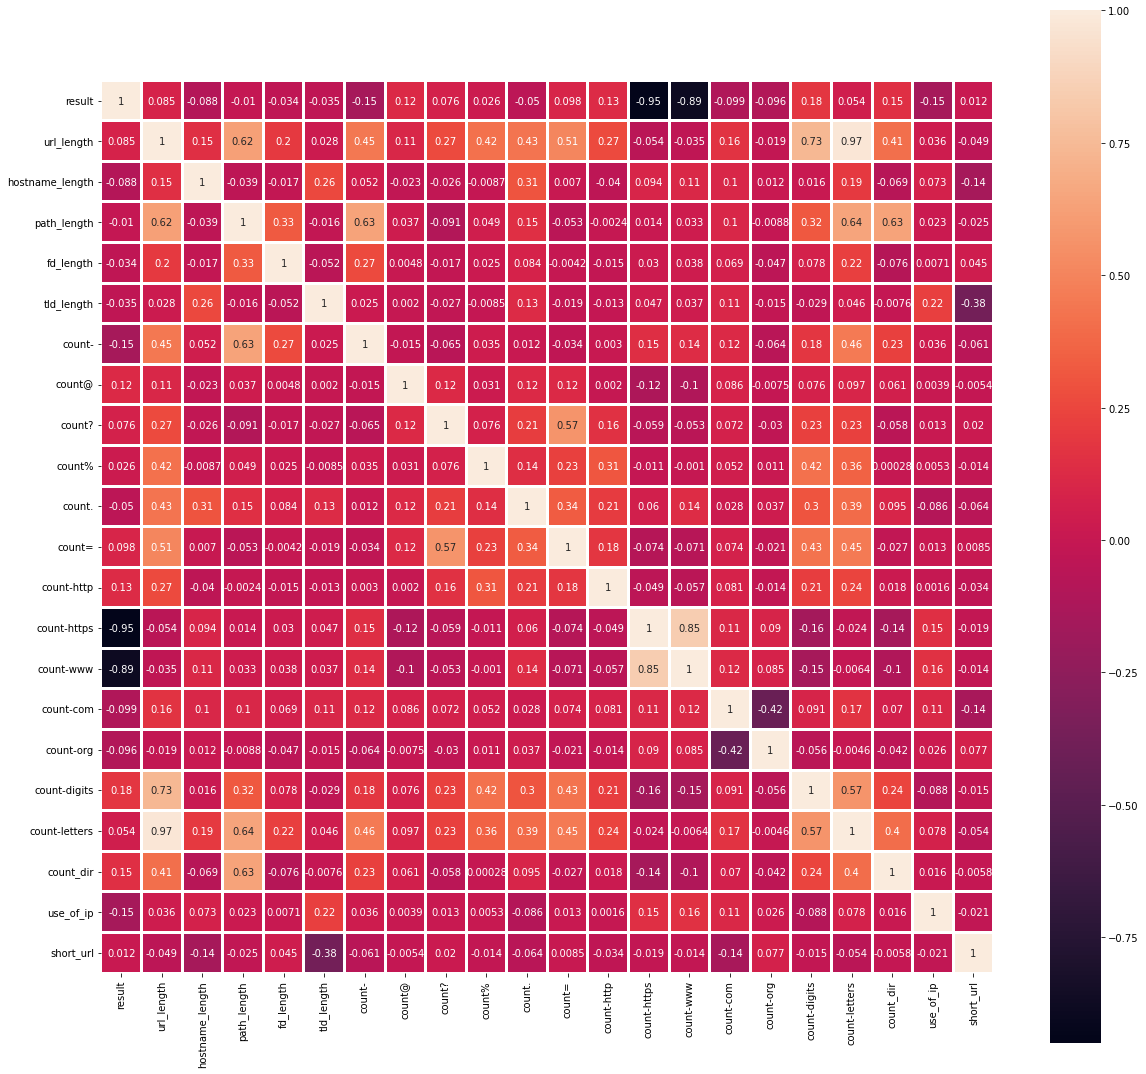

In [ ]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(20,19))
sns.heatmap(corrmat, square=True, annot = True, linewidths=2,  annot_kws={'size':10})

#plt.style.use('seaborn-whitegrid')
#plt.rcParams.update({'figure.figsize':(25,19), 'figure.dpi':100})
#%matplotlib inline


#x=np.linspace(1,100,50)
#y=np.log(x)
#plt.plot(x,y)
#plt.xlabel('x')
#plt.ylabel('logx')
#plt.title('Simple Line Plot')
#plt.xlim(0,100)
#plt.ylim(0,5)

Text(0, 0.5, 'Number Of URLs')

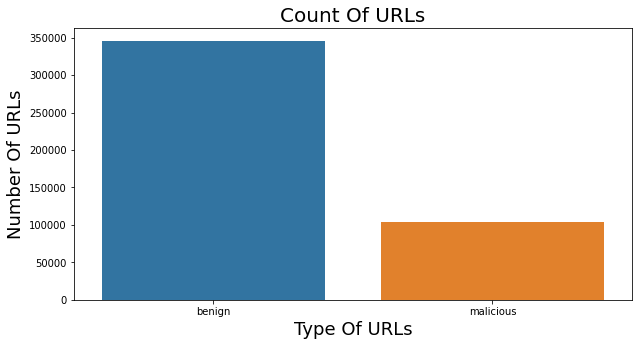

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


(0.0, 1000.0)

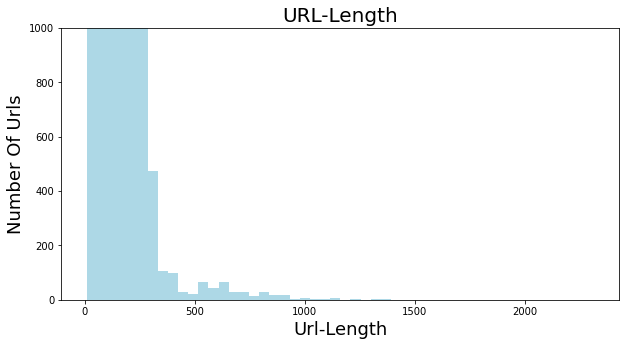

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)


(0.0, 1000.0)

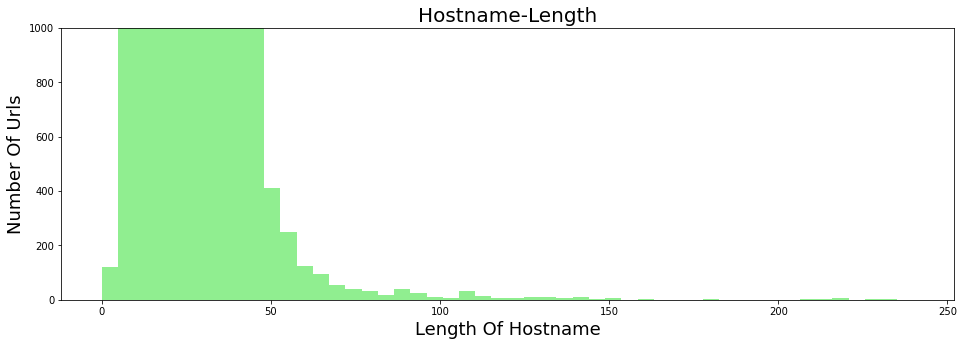

In [ ]:
plt.figure(figsize=(16,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

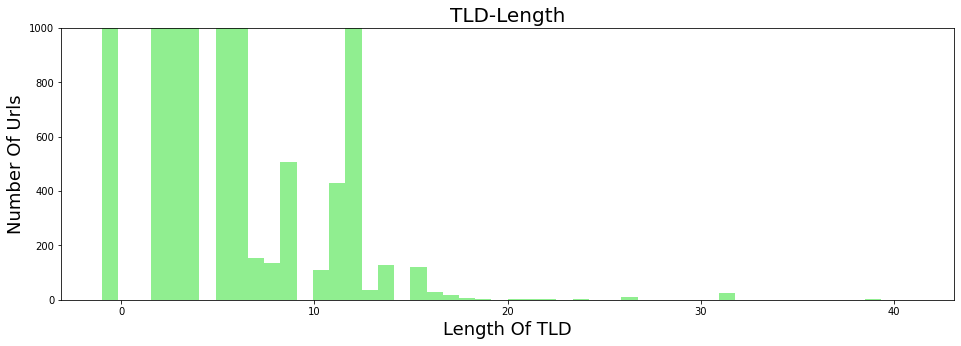

In [ ]:
plt.figure(figsize=(16,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

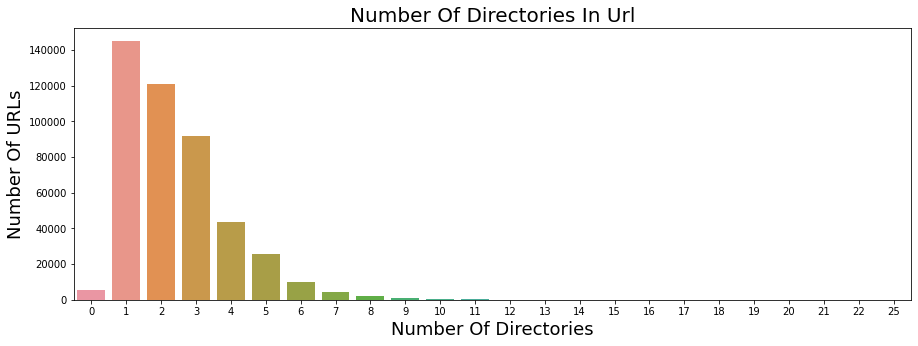

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

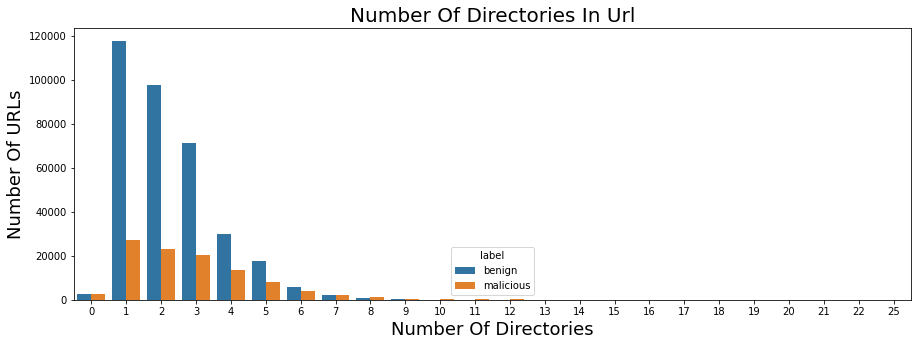

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of URLs')

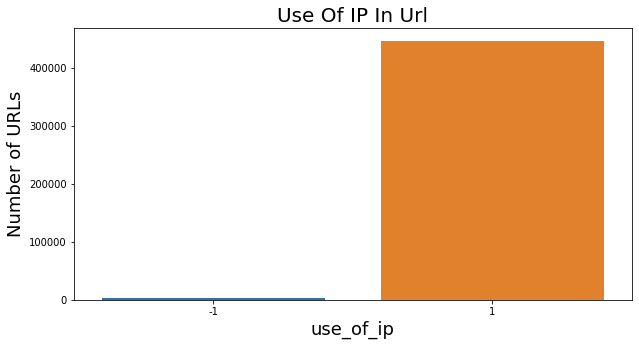

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(urldata['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of URLs')

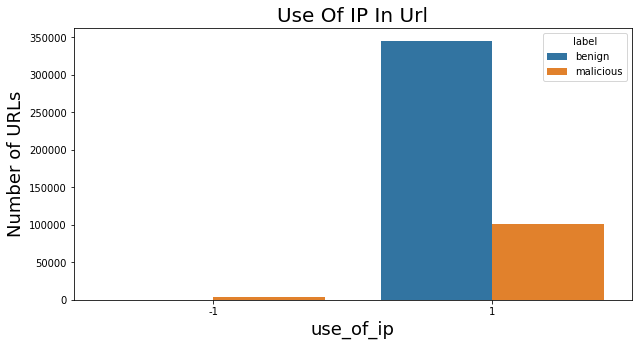

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['use_of_ip'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of URLs')

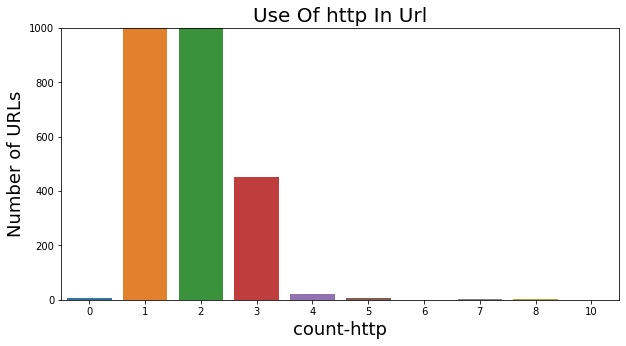

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of URLs')

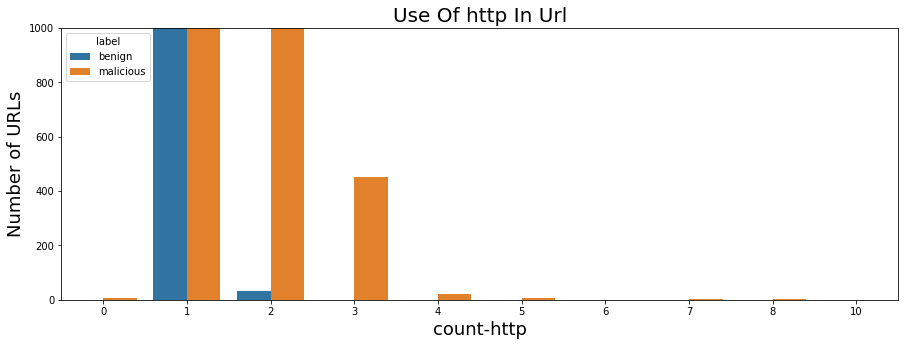

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of URLs')

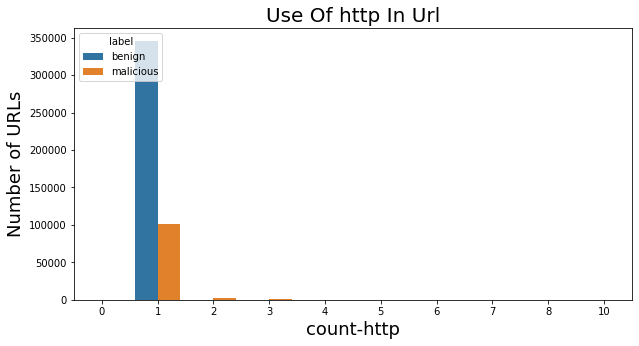

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(urldata['count-http'],hue='label',data=urldata)

plt.ylabel("Number of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number Of URLs')

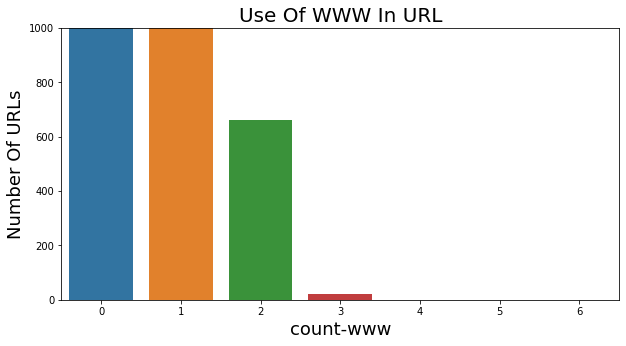

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(urldata['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number Of URLs')

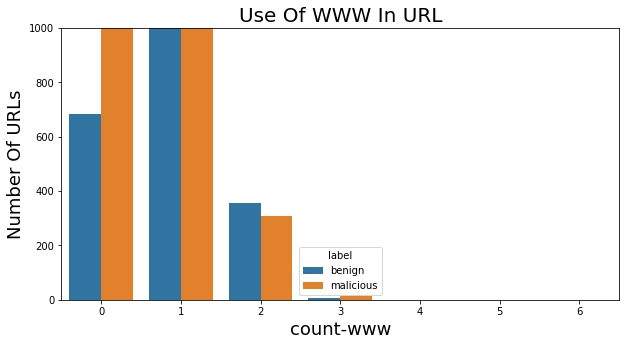

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(urldata['count-www'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn import svm

from sklearn import metrics

import time


import timeit

import matplotlib.pyplot as plt

from sklearn import model_selection

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [ ]:
#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = urldata['result']

In [ ]:
x.shape

(450176, 17)

In [ ]:
y.shape

(450176,)

In [ ]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.1, random_state=30)

In [ ]:
#Decision Tree
start = time.time()
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

dt_predictions = dt_model.predict(x_test)

f1_score_dt = metrics.f1_score(y_test,dt_predictions,average='macro')
print('F1 score: {0:f}'.format (f1_score_dt))
#print(classification_report(y_test,dt_predictions))
#print(confusion_matrix(y_test,dt_predictions))
sdt = precision_score(y_test, dt_predictions, average='macro')
print('precision score: {0:f}'.format (sdt))
s_dt = recall_score(y_test,dt_predictions, average='macro')
print('recall score: {0:f}'.format (s_dt))
score_dt = metrics.accuracy_score(y_test,dt_model.predict(x_test))
print('Accuracy:{0:f}'.format(score_dt))


end = time.time()
print('training time', end - start, "seconds")



F1 score: 0.993612
precision score: 0.993980
recall score: 0.993244
Accuracy:0.995454
training time 0.972623348236084 seconds


In [ ]:
#print(confusion_matrix(y_test,dt_predictions))

In [ ]:
#Random Forest
start = time.time()
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test) 

f1_score_rf = metrics.f1_score(y_test,rfc_predictions,average='macro')
print('F1 score: {0:f}'.format (f1_score_rf))
#print(classification_report(y_test,y_pred_rf))
#print(confusion_matrix(y_test,y_pred_rf))
srf = precision_score(y_test, rfc_predictions, average='macro')
print('precision score: {0:f}'.format (srf))
s_rf = recall_score(y_test,rfc_predictions, average='macro')
print('recall score: {0:f}'.format (s_rf))
score_rf = metrics.accuracy_score(y_test,rfc.predict(x_test))
print('Accuracy:{0:f}'.format(score_rf))

end = time.time()
print('training time', end - start, "seconds")

F1 score: 0.996018
precision score: 0.996942
recall score: 0.995101
Accuracy:0.997169
training time 13.769188165664673 seconds


In [ ]:
#print(confusion_matrix(y_test,rfc_predictions))

In [ ]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler
start = time.time()
#log_model = LogisticRegression()
#log_model.fit(x_train,y_train)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

log_model = LogisticRegression(random_state=0, solver="liblinear")
log_model.fit(x_train, y_train)

log_predictions = log_model.predict(x_test)


f1_score_lr = metrics.f1_score(y_test,log_predictions,average='macro')
print('F1 score: {0:f}'.format (f1_score_lr))
#print(classification_report(y_test,y_pred_lr))
#print(confusion_matrix(y_test,y_pred_lr))
slr = precision_score(y_test, log_predictions, average='macro')
print('precision score: {0:f}'.format (slr))
s_lr = recall_score(y_test,log_predictions, average='macro')
print('recall score: {0:f}'.format (s_lr))
score_lr = metrics.accuracy_score(y_test,log_model.predict(x_test))
print('Accuracy:{0:f}'.format(score_lr))
end = time.time()
print('training time', end - start, "seconds")

F1 score: 0.995067
precision score: 0.995202
recall score: 0.994933
Accuracy:0.996488
training time 1.000216007232666 seconds


In [ ]:
#svm
start = time.time()
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

clf_predictions = clf.predict(x_test)


f1_score_svm = metrics.f1_score(y_test,clf_predictions,average='macro')
print('F1 score: {0:f}'.format (f1_score_svm))
#print(classification_report(y_test,y_pred_svm))
#print(confusion_matrix(y_test,y_pred_svm))
ssvm = precision_score(y_test, clf_predictions, average='macro')
print('precision score: {0:f}'.format (ssvm))
s_svm = recall_score(y_test,clf_predictions, average='macro')
print('recall score: {0:f}'.format (s_svm))
score_svm = metrics.accuracy_score(y_test,clf.predict(x_test))
print('Accuracy:{0:f}'.format(score_svm))

end = time.time()
print('training time', end - start, "seconds")

F1 score: 0.995219
precision score: 0.995394
recall score: 0.995044
Accuracy:0.996596
training time 9.700838327407837 seconds


In [ ]:
#Naive Bayes
start = time.time()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

f1_score_nb = metrics.f1_score(y_test,y_pred_nb,average='macro')
print('F1 score: {0:f}'.format (f1_score_nb))
#print(classification_report(y_test,y_pred_nb))
#print(confusion_matrix(y_test,y_pred_nb))
snb = precision_score(y_test, y_pred_nb, average='macro')
print('precision score: {0:f}'.format (snb))
s_nb = recall_score(y_test,y_pred_nb, average='macro')
print('recall score: {0:f}'.format (s_nb))
score_nb = metrics.accuracy_score(y_test,nb.predict(x_test))
print('Accuracy:{0:f}'.format(score_nb))

end = time.time()
print('training time', end - start, "seconds")

F1 score: 0.990600
precision score: 0.988009
recall score: 0.993254
Accuracy:0.993269
training time 0.8738512992858887 seconds


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
k=10

start = time.time()
clf = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
clf.fit(x_train, y_train)
y_pred_k = clf.predict(x_test)
f1_score_K = metrics.f1_score(y_test,y_pred_k,average='macro')
print('F1 score: {0:f}'.format (f1_score_K))
sK = precision_score(y_test, y_pred_k, average='macro')
print('precision score: {0:f}'.format (sK))
s_K = recall_score(y_test,y_pred_k, average='macro')
print('recall score: {0:f}'.format (s_K))
score_K = metrics.accuracy_score(y_test,clf.predict(x_test))
print('Accuracy:{0:f}'.format(score_K))

end = time.time()
print('training time', end - start, "seconds")

F1 score: 0.994683
precision score: 0.996098
recall score: 0.993285
Accuracy:0.996224
training time 727.8851275444031 seconds


In [ ]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(x_train,y_train)
y_pred_gb = gbdt.predict(x_test)
f1_score_gb = metrics.f1_score(y_test,y_pred_gb,average='macro')
print('F1 score: {0:f}'.format (f1_score_gb))
sgb = precision_score(y_test, y_pred_gb, average='macro')
print('precision score: {0:f}'.format (sgb))
s_gb = recall_score(y_test,y_pred_gb, average='macro')
print('recall score: {0:f}'.format (s_gb))
score_gb = metrics.accuracy_score(y_test,gbdt.predict(x_test))
print('Accuracy:{0:f}'.format(score_gb))
end = time.time()
print('training time', end - start, "seconds")

F1 score: 0.995479
precision score: 0.995715
recall score: 0.995243
Accuracy:0.996782
training time 3.802900791168213 seconds


In [ ]:
#LightGBM
from lightgbm import LGBMClassifier
start = time.time()
lgbm = LGBMClassifier(n_neighbors=k, p=2, weights='distance')
lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm.predict(x_test)
f1_score_lgbm = metrics.f1_score(y_test,y_pred_lgbm,average='macro')
print('F1 score: {0:f}'.format (f1_score_lgbm))
slgbm = precision_score(y_test, y_pred_lgbm, average='macro')
print('precision score: {0:f}'.format (slgbm))
s_lgbm = recall_score(y_test,y_pred_lgbm, average='macro')
print('recall score: {0:f}'.format (s_lgbm))
score_lgbm = metrics.accuracy_score(y_test,lgbm.predict(x_test))
print('Accuracy:{0:f}'.format(score_lgbm))
end = time.time()
print('training time', end - start, "seconds")

F1 score: 0.995839
precision score: 0.996912
recall score: 0.994777
Accuracy:0.997043
training time 4.430237054824829 seconds


In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

#import plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import itertools
#plt.style.use('fivethirtyeight')
#import seaborn as sns

scores=[score_rf, score_lgbm, score_lr, score_svm, score_nb, score_K, score_gb]
AlgorthmsName=["Random Forest","LightGBM","Logistic Regression","SVM","Naive Bayes", "K-NN", "GradientBooting"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Accuracy Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)
#plt.figure(figsize=(10,5))

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#scaled_data  = scaler.fit_transform(x)
#x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.4)

#print("Training size: %d" % len(y_train))
#print("Test size    : %d" % len(y_test))

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
#from sklearn.metrics import accuracy_score, classification_report
#import time
#from sklearn.model_selection import KFold


#models = []
#models.append(('KNN', KNeighborsClassifier(n_neighbors=k, p=2, weights='distance'), 0))
#models.append(('GB',GradientBoostingClassifier(n_estimators=100,max_features='sqrt'), 0))
#models.append(('SVM', svm.SVC(kernel='linear'), 0))
#models.append(('NB', GaussianNB(), 0))
#models.append(('LG',LogisticRegression(random_state=0, solver="liblinear"), 0))
#models.append(('RF', RandomForestClassifier(), 0))
#models.append(('DT', DecisionTreeClassifier(), 0))
# models with normalization on numerical columns
#models.append(('KNN-S', KNeighborsClassifier(n_neighbors=k, p=2, weights='distance'), 1))


#results = []
#names = []
#run_times = []
#scoring = 'accuracy'
#for name, model, scaler in models:
 #   start = time.time()
#    kfold = KFold(n_splits=10, random_state=None)
 #   if(scaler==1):
#        scaler = MinMaxScaler()
#        scaled_x  = scaler.fit_transform(x)
#        cv_results = cross_val_score(model, scaled_x, y, cv=10, scoring=scoring)
#    else:
#        cv_results = cross_val_score(model, x, y, cv=10, scoring=scoring)
#    stop= time.time()
#    run_times.append(stop-start)
#    results.append(cv_results)
#    names.append(name)
#    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#    print(msg)
    

#print( "Run times: %s" % (run_times))
# boxplot algorithm comparison
#fig = plt.figure()
#fig.suptitle('Accuracy Comparison')
#ax = fig.add_subplot(111)
#plt.boxplot(results)
#ax.set_xticklabels(names)
#plt.show()


#y_pos = np.arange(len(names))
#plt.bar(y_pos, run_times, align='center', alpha=0.5)
#plt.xticks(y_pos, names)
#plt.title('Time Comparison')
#plt.show()

In [ ]:
#algo = ['RF','DT','LR','SVM','NB','K','GB']
#score = [score_rf, score_dt, score_lr, score_svm, score_nb, score_K, score_gb]
#c = ['Red','Blue','Green', 'Brown', 'Black','Yellow', 'Maroon']
#plt.figure(figsize=(10,4))
#plt.bar(algo,score,width=0.6, color=c)
#plt.title('Evaluating accuracies')
#plt.ylabel('Accuracy score')
#plt.ylim(0.000,1.010)
#plt.show()

#algo = ['RF','DT','LR','SVM','NB']
#score = [f1_score_rf, f1_score_dt, f1_score_lr, f1_score_svm, f1_score_nb]
#c = ['Red','Blue','Green', 'Brown', 'Black']
#plt.figure(figsize=(10,6))
#plt.bar(algo,score,width=0.5, color=c)
#plt.title('Evaluating F1 score')
#plt.ylabel('F1 score')
#plt.ylim(0,1.01)
#plt.show()

#algo = ['RF','DT','LR','SVM','NB']
#score = [srf,sdt,slr,ssvm,snb]
#c = ['Red','Blue','Green', 'Brown', 'Black']
#plt.figure(figsize=(10,6))
#plt.bar(algo,score,width=0.5, color=c)
#plt.title('Evaluating Precision')
#plt.ylabel('Precision score')
#plt.ylim(0,1.01)
#plt.show()

#algo = ['RF','DT','LR','SVM','NB']
#score = [s_rf,s_dt,s_lr,s_svm,s_nb]
#c = ['Red','Blue','Green', 'Brown', 'Black']
#plt.figure(figsize=(10,6))
#plt.bar(algo,score,width=0.5, color=c)
#plt.title('Evaluating Recall score')
#plt.ylabel('Recall score')
#plt.ylim(0,1.01)
#plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fp1, tp1, thresholds1 = roc_curve(y_test, rfc_predictions[:])
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, y_pred_lgbm[:])
roc_auc_model2 = auc(fp2, tp2)
fp3, tp3, thresholds3 = roc_curve(y_test, log_predictions[:])
roc_auc_model3 = auc(fp3, tp3)
fp4, tp4, thresholds4 = roc_curve(y_test, y_pred_nb[:])
roc_auc_model4 = auc(fp4, tp4)
fp5, tp5, thresholds5 = roc_curve(y_test, y_pred_k[:])
roc_auc_model5 = auc(fp5, tp5)
fp6, tp6, thresholds5 = roc_curve(y_test, y_pred_gb[:])
roc_auc_model6 = auc(fp6, tp6)
fp7, tp7, thresholds7 = roc_curve(y_test, clf_predictions[:])
roc_auc_model7 = auc(fp7, tp7)

print("AUC for Random Forest Model : ",roc_auc_model1)
print("AUC for LightGBM Model:", roc_auc_model2)
print("AUC for Logistic Regression Model :" ,roc_auc_model3)
print("AUC for Naive Bayes Model :" ,roc_auc_model4)
print("AUC for KNN Model :" ,roc_auc_model5)
print("AUC for GradiantBoosting Model :" ,roc_auc_model6)
print("AUC for Support Vector Machine Model :" ,roc_auc_model7)



AUC for Random Forest Model :  0.995100840063383
AUC for LightGBM Model: 0.9947772089702721
AUC for Logistic Regression Model : 0.9949326555389331
AUC for Naive Bayes Model : 0.9932544289613047
AUC for KNN Model : 0.9932845064908252
AUC for GradiantBoosting Model : 0.9952428073015291
AUC for Support Vector Machine Model : 0.9950442399112074


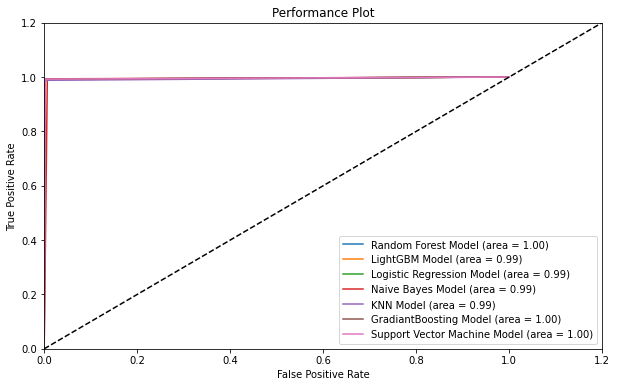

In [ ]:
plt.figure(figsize=(10,6))
plt.clf()
plt.plot(fp1, tp1, label='Random Forest Model (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='LightGBM Model (area = %0.2f)' % roc_auc_model2)
plt.plot(fp3, tp3, label='Logistic Regression Model (area = %0.2f)' %roc_auc_model3)
plt.plot(fp4, tp4, label='Naive Bayes Model (area = %0.2f)' %roc_auc_model4)
plt.plot(fp5, tp5, label='KNN Model (area = %0.2f)' %roc_auc_model5)
plt.plot(fp6, tp6, label='GradiantBoosting Model (area = %0.2f)' %roc_auc_model6)
plt.plot(fp7, tp7, label='Support Vector Machine Model (area = %0.2f)' %roc_auc_model7)
plt.plot([0, 1.2], [0, 1.2], 'k--')
plt.xlim([0.0, 1.2])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Performance Plot')
plt.legend(loc="lower right")
plt.show()